真の係数:
[ 1.5 -2.   0.   0.5  0.   0.   0.   0.   0.   0. ]

線形回帰の係数:
[ 0.79550207 -2.00379689 -0.01296617  1.21046272 -0.01044944 -0.00586796
 -0.03841722  0.00779027  0.00729086  0.00558994]

リッジ回帰の係数:
[ 0.99250787 -2.00177433 -0.01277339  1.01234823 -0.01033188 -0.00573629
 -0.03840776  0.00784172  0.00709423  0.00552901]

ラッソ回帰の係数:
[ 1.86538031 -1.89766916 -0.          0.0397186  -0.          0.
 -0.          0.          0.          0.        ]


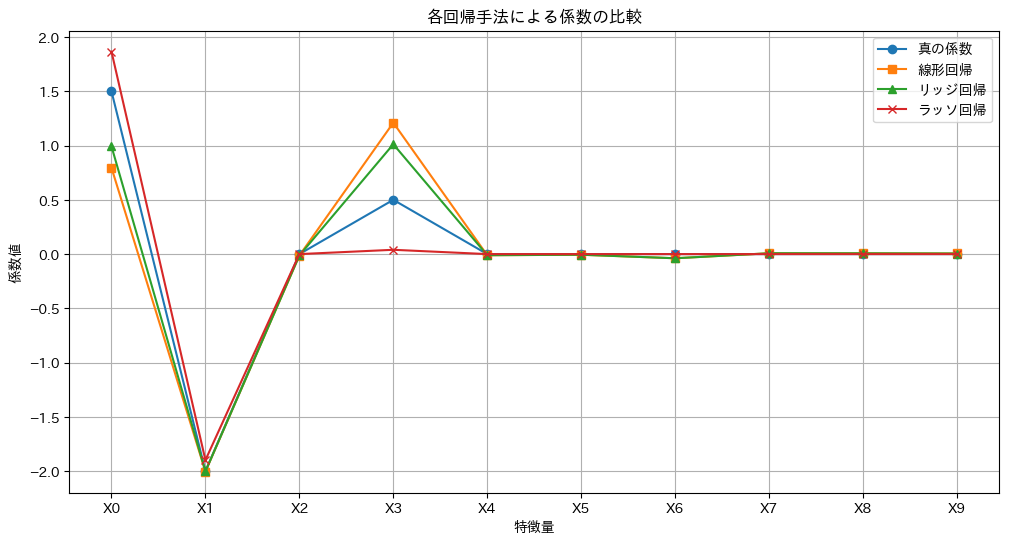

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 再現性のために乱数シードを固定
np.random.seed(0)

# データの作成
n_samples = 1000  # サンプル数
n_features = 10  # 特徴量の数

# 真の係数（スパース性を持たせるため、いくつかの係数はゼロ）
true_coef = np.zeros(n_features)
true_coef[0] = 1.5   # X0の係数
true_coef[1] = -2.0  # X1の係数
true_coef[3] = 0.5   # X3の係数

# 説明変数の生成
X = np.random.randn(n_samples, n_features)

# 多重共線性を導入（X1はX0にノイズを加えたもの）
X[:, 3] = X[:, 0]  + np.random.normal(0, 0.01, n_samples)

# 目的変数の生成
noise = np.random.normal(0, 0.5, n_samples)
y = np.dot(X, true_coef) + noise

# モデルの学習
# 正則化なしの線形回帰
lr = LinearRegression()
lr.fit(X, y)

# リッジ回帰
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# ラッソ回帰
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# 係数の表示
print("真の係数:")
print(true_coef)
print("\n線形回帰の係数:")
print(lr.coef_)
print("\nリッジ回帰の係数:")
print(ridge.coef_)
print("\nラッソ回帰の係数:")
print(lasso.coef_)

# 係数の可視化
coef_labels = [f'X{i}' for i in range(n_features)]
x = np.arange(n_features)

plt.figure(figsize=(12, 6))
plt.plot(x, true_coef, 'o-', label='真の係数')
plt.plot(x, lr.coef_, 's-', label='線形回帰')
plt.plot(x, ridge.coef_, '^-', label='リッジ回帰')
plt.plot(x, lasso.coef_, 'x-', label='ラッソ回帰')
plt.xticks(x, coef_labels)
plt.xlabel('特徴量')
plt.ylabel('係数値')
plt.title('各回帰手法による係数の比較')
plt.legend()
plt.grid(True)
plt.show()